# Logistic Regression from Scratch

We use sigmoid function to convert (-infinity, +infinity) --> [0,1] <br>
__Sigmoid Function__ : g(x) = 1/(1+e^-x) which gives the probability of x belonging to class 1. (There are 2 classes i.e., 0 & 1) <br>

__Lets take class 0 as +ve and class 1 as -ve class.__ <br>
If __d < 0__ then it belongs to left class i.e., __class 0__ [0, 0.5] <br>
If __d > 0__ then it belongs to right class i.e., __class 1__ [0.5, 1] <br>
[ check it by putting x = d in sigmoid function ] <br>

P(y=1 / x,theta) = h(x <br>
P(y=0 / x,theta) = 1 - h(x) <br>
where, h is hypothesis means probabilty <br>
=> P(y / x, theta) = [h(x)]^ya * [1 - h(x)]^(1-ya) <br>
where, ya -> y actual <br>

__Goal:__ Find such a line for which probability for all points should be maximum. <br>

Likelihood: L = product [ ([yi]^ya * [1 - yi]^(1-ya) ] from i = 1 to n where, yi is y_predicted <br>
but this become a very large calculation. So we take log of this <br>

LL(theta) = sum ( ya* log([h(x)]) + (1-ya)*log( [1 - h(x)]) ) from i = 1 to n <br>

we have to maximize this using gradient descent (-ve) or gradient ascent (+ve). <br>

__Summing up gradient over all examples for each feature.__ <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_blobs(n_samples=1000, centers= 2, random_state = 0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [4]:
model = LogisticRegression()

In [5]:
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)

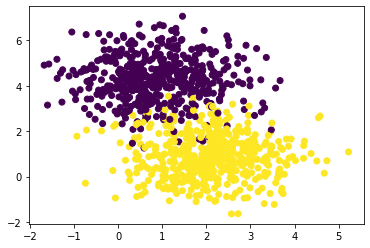

In [7]:
plt.scatter(X[:,0], X[:,1], c = y)

In [8]:
class CustomLogisticRegression:
    
    # constructor
    def __init__(self, lr=0.01, iters= 20):
        self._lr = lr
        self._iters = iters
    
    def fit(self, X, y):
        self._y = y.reshape(-1,1)
        X_mod = np.hstack([np.ones([len(X), 1]), X])                                # X.shape = (1000,2)
        self._X = X_mod
        
        self._theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self._iters):
            err.append(self.error())
            self.gradient_ascent()
            
        self.theta = self._theta
        
        return err
    
    def gradient_ascent(self):
        delta_theta = self.gradient()
      # print(delta_theta.shape) # (3,1)
        self._theta -= delta_theta
    
    def gradient(self):
        yh = self.hypothesis(self._X)
     # print(yh.shape) # (1000, 1)
        ya = self._y
        diff = -(ya - yh)                                                                    # (1000, 1) # here i have taken -ve of log likelyhood, hence gradiet descent            
        return np.dot(self._X.T, diff) * self._lr                             # (3,1) # for every feature, sum(diff * ith example)
    
    def hypothesis(self, X):
        prod = np.dot(X, self._theta)
     # print(X.shape) # (1000,3)        
     # print(self.__theta.shape) # (3,1)
     # print(prod.shape) # (1000,1)
        return 1 / (1 + np.exp(-prod))
 
    def error(self):
        yh = self.hypothesis(self._X)
        ya = self._y
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)                                              # ll is Likelihood
     # print(ll.shape) # (1000, 1)
        return -np.mean(ll)

    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)
    
    def confusion_matrix(self, X, y):
        yp = self.predict(X)
        
        tp = np.mean((y==1) & (yp==1))
        tn = np.mean((y==0) & (yp==0))
        fp = np.mean((y==0) & (yp==1))
        fn = np.mean((y==1) & (yp==0))
        
        return np.array([[tp, fp], [fn, tn]])

In [9]:
model = CustomLogisticRegression()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [11]:
err = model.fit(X_train, y_train)

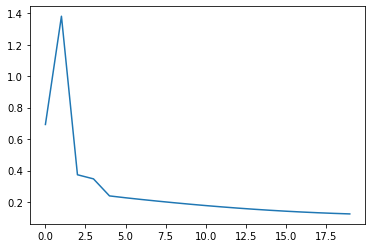

In [12]:
plt.plot(err)

In [13]:
model.theta

array([[ 3.4875743 ],
       [ 1.73510659],
       [-2.4108481 ]])

In [14]:
model.score(X_test, y_test)

0.9454545454545454

In [16]:
model.confusion_matrix(X_test, y_test)

array([[0.46666667, 0.02727273],
       [0.02727273, 0.47878788]])